In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

from src.data.vol.get_atm_vol_surface import get_atm_vol_surface
data, uniq_opt_tenors, uniq_swap_tenors = get_atm_vol_surface()

# Normalize data
from src.data.vol.normalizer import Normalizer
normalizer = Normalizer()
data_norm = normalizer.normalize(data)

### Create and train the model

In [2]:
# Create VAE and fit it
from src.models.vae_vanilla import VaeVanilla
vae = VaeVanilla(input_shape=data_norm.shape[1:],
                 hidden_layers_nodes=[192, 96, 48, 24, 12, 6],
                 latent_space_dim=2,
                 loss_type='mse',
                 beta=0.0002)
vae.compile(optimizer='adam')
history = vae.fit(data_norm, 
                  epochs=50, 
                  batch_size=16)  # add validation_data=x_test


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 1.0647e-04 - reconstruction_loss: 14.7756 - total_loss: 14.7754
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 6.0826e-05 - reconstruction_loss: 11.6351 - total_loss: 11.6350
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0031 - reconstruction_loss: 11.3551 - total_loss: 11.3579 
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0101 - reconstruction_loss: 11.1311 - total_loss: 11.1409
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0085 - reconstruction_loss: 11.1174 - total_loss: 11.1257
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0070 - reconstruction_loss: 11.1073 - total_loss: 11.1141
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0064 - reconstruction_loss: 11.0973 - total_loss: 11.1035
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0053 - reconstruction_loss: 11.0934 - total_loss: 11.0984
Epoch 

### Plot history of losses

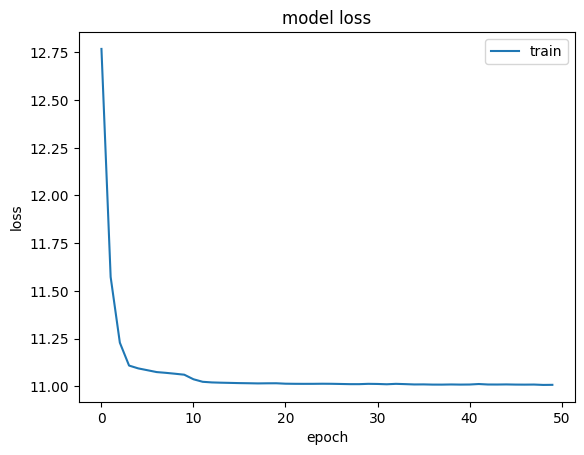

In [3]:
from src.visualization.plot_history_of_losses import plot_history_of_losses
plot_history_of_losses(history)

### Plot 2d latent space values

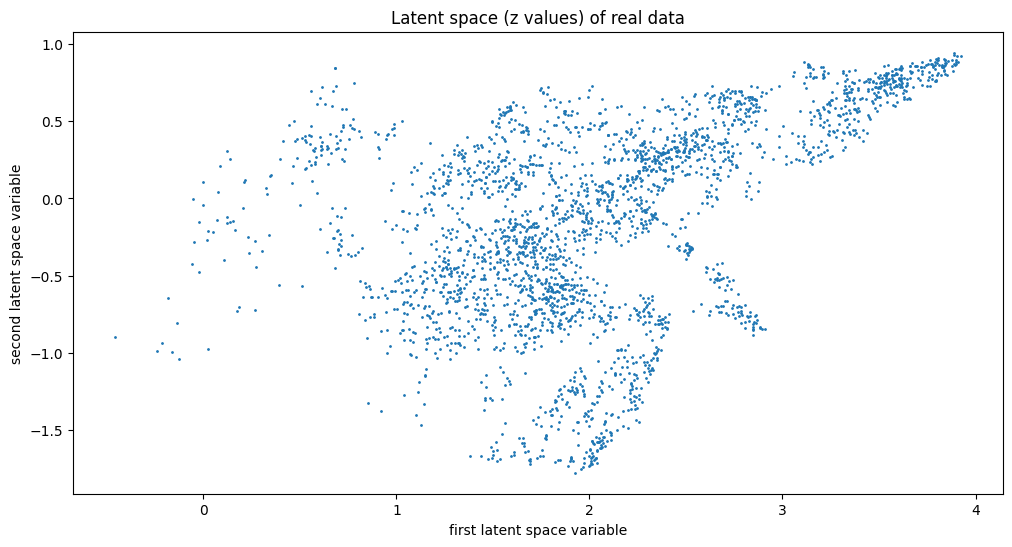

In [4]:
from src.visualization.plot_latent_space_2d_values import plot_latent_space_2d_values
plot_latent_space_2d_values(vae, 
                            data_norm,
                            vae_latent_type='z')

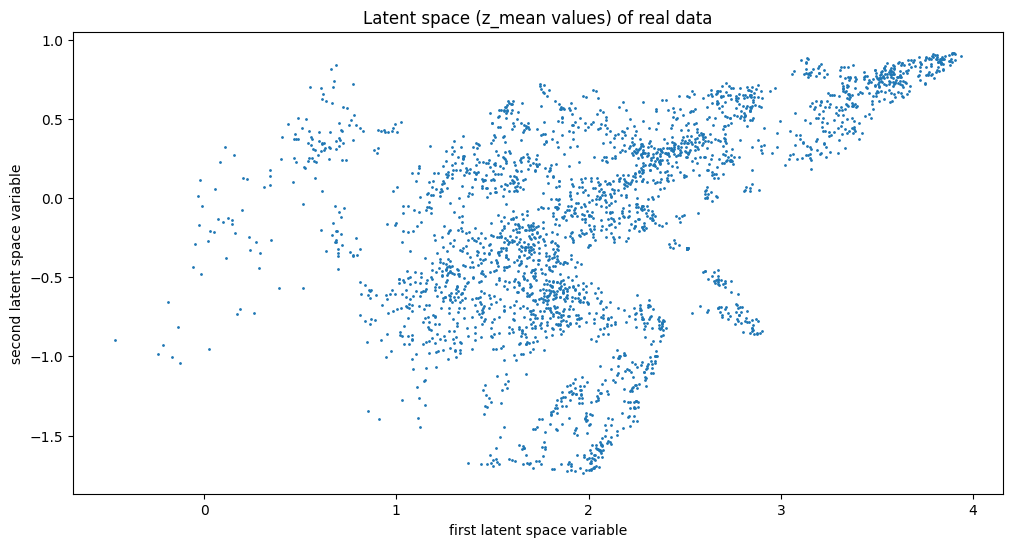

In [5]:
# КАК С ТАКИМИ СРЕДНИМИ МОЖЕТ БЫТЬ Z МЕЖДУ -3 и 3 всегда???
from src.visualization.plot_latent_space_2d_values import plot_latent_space_2d_values
plot_latent_space_2d_values(vae, 
                            data_norm,
                            vae_latent_type='z_mean')

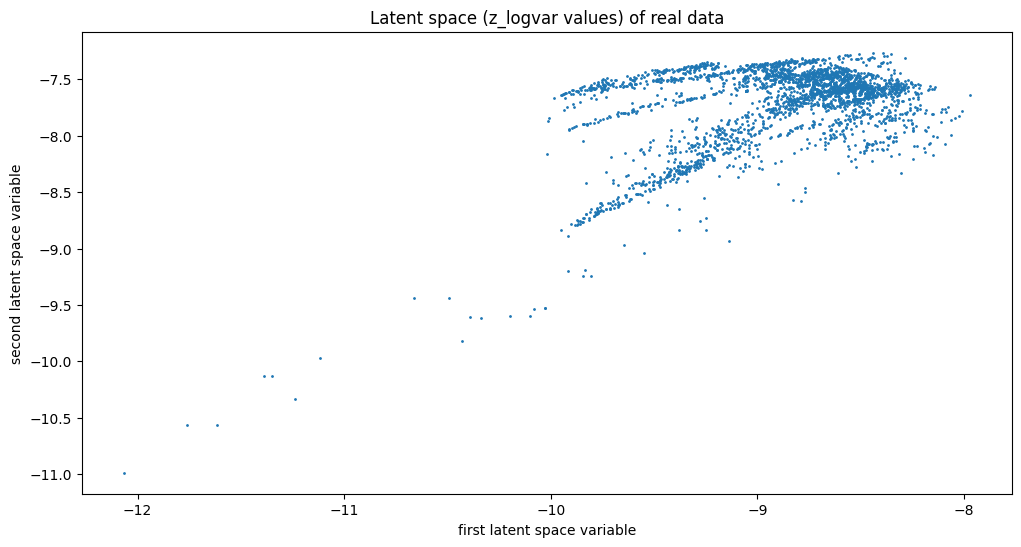

In [6]:
from src.visualization.plot_latent_space_2d_values import plot_latent_space_2d_values
plot_latent_space_2d_values(vae, 
                            data_norm,
                            vae_latent_type='z_logvar')

### Error histograms

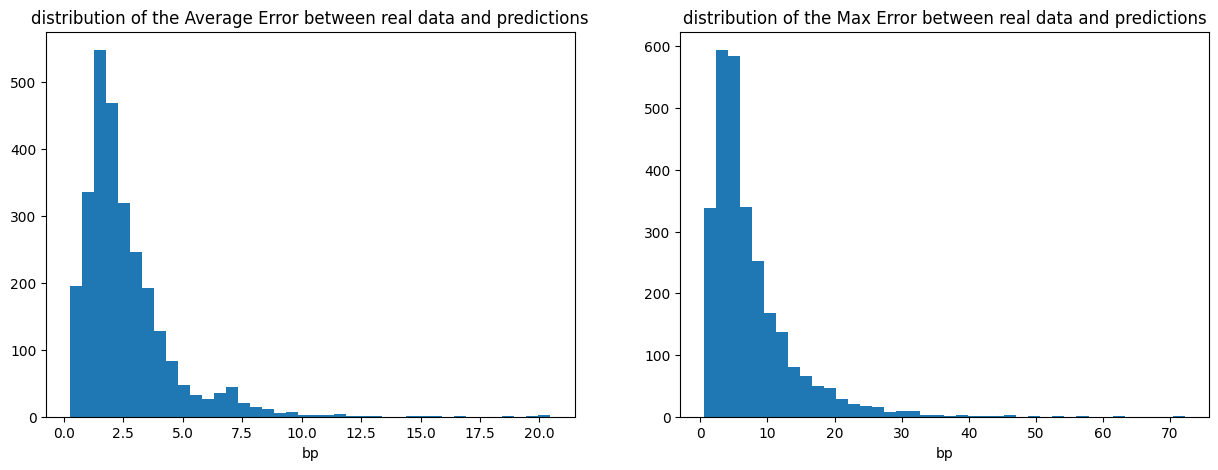

In [7]:
from src.visualization.vol.error_histograms import error_histograms
error_histograms(vae,
                 data,
                 normalizer)

### Changing of vol surface when we change z0 values

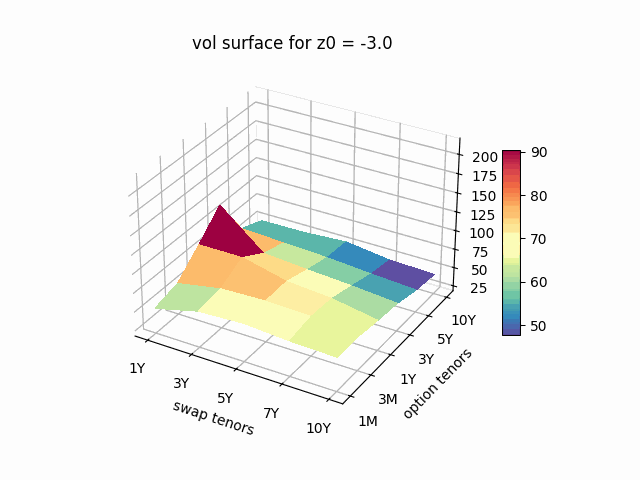

In [8]:
from src.visualization.vol.plot_surface_for_diff_z import plot_surface_for_diff_z

plot_surface_for_diff_z(vae,
                        normalizer,
                        all_z_vals=[0,0],
                        z_idx=0,
                        x_labels=uniq_swap_tenors,
                        y_labels=uniq_opt_tenors,
                        name='2lat_z0',
                        fps=3)

### Changing of vol surface when we change z1 values

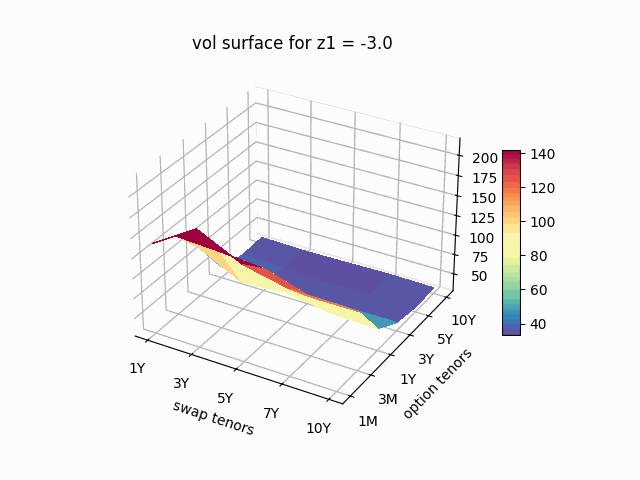

In [9]:
from src.visualization.vol.plot_surface_for_diff_z import plot_surface_for_diff_z

plot_surface_for_diff_z(vae,
                        normalizer,
                        all_z_vals=[0,0],
                        z_idx=1,
                        x_labels=uniq_swap_tenors,
                        y_labels=uniq_opt_tenors,
                        name='2lat_z1',
                        fps=3)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


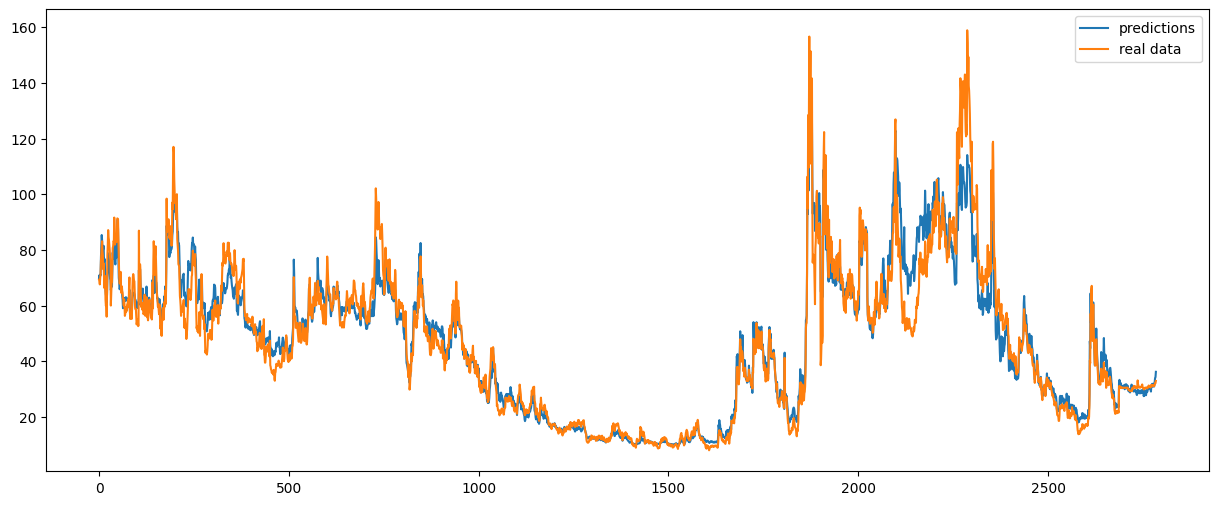

In [10]:
import matplotlib.pyplot as plt
N1 = 0  # indexes of data dimension
N2 = 0  # indexes of data dimension

predictions = normalizer.denormalize(vae.predict(x=data_norm))
plt.figure(figsize=(15,6))
plt.plot(predictions[:, N1, N2], label='predictions')
plt.plot(data[:, N1, N2], label='real data')
plt.legend()
plt.show()

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


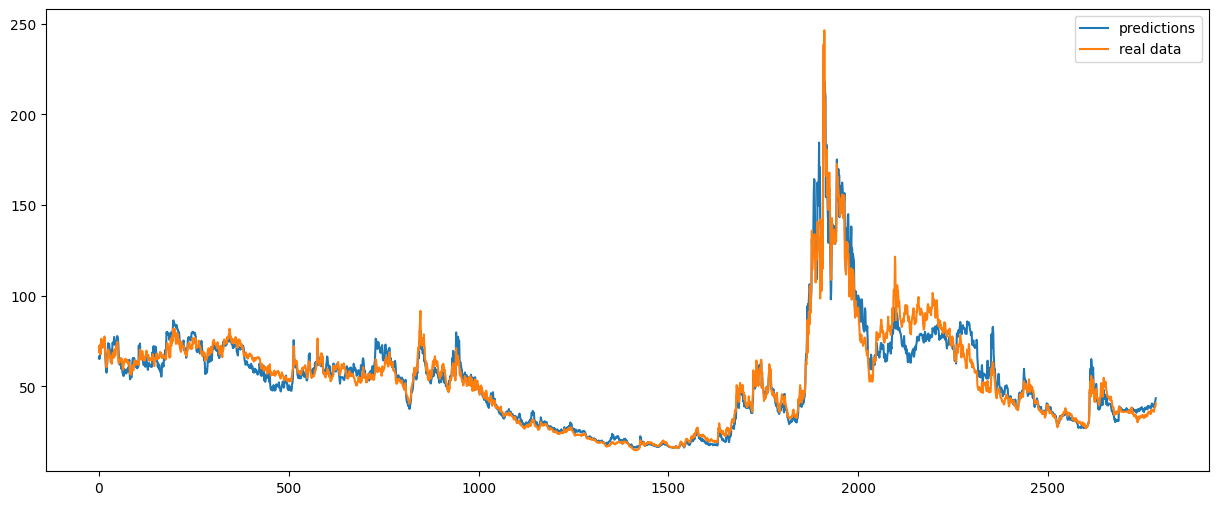

In [11]:
import matplotlib.pyplot as plt
N1 = 2  # indexes of data dimension
N2 = 0  # indexes of data dimension

predictions = normalizer.denormalize(vae.predict(x=data_norm))
plt.figure(figsize=(15,6))
plt.plot(predictions[:, N1, N2], label='predictions')
plt.plot(data[:, N1, N2], label='real data')
plt.legend()
plt.show()

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


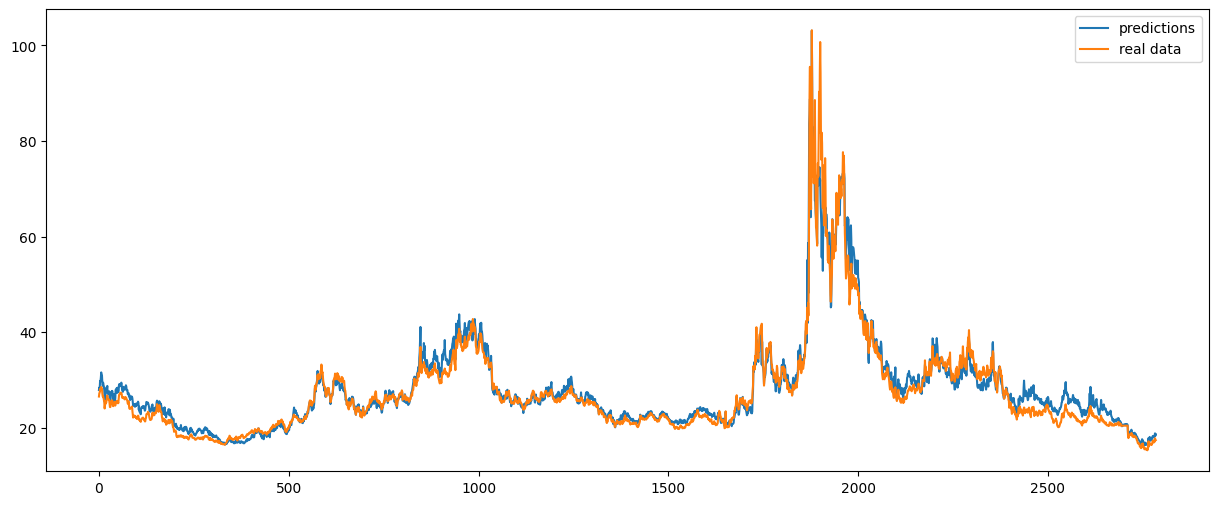

In [12]:
import matplotlib.pyplot as plt
N1 = 5  # indexes of data dimension
N2 = 4  # indexes of data dimension

predictions = normalizer.denormalize(vae.predict(x=data_norm))
plt.figure(figsize=(15,6))
plt.plot(predictions[:, N1, N2], label='predictions')
plt.plot(data[:, N1, N2], label='real data')
plt.legend()
plt.show()